2023-03-25 15:05:12,634 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-2.82
2023-03-25 15:05:13,445 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -2.8213267548333523, best pos: [0.47869218 0.44340827 0.97767147 0.99663507 0.63728665 0.16368443]


<AxesSubplot:title={'center':'Cost History'}, xlabel='Iterations', ylabel='Cost'>

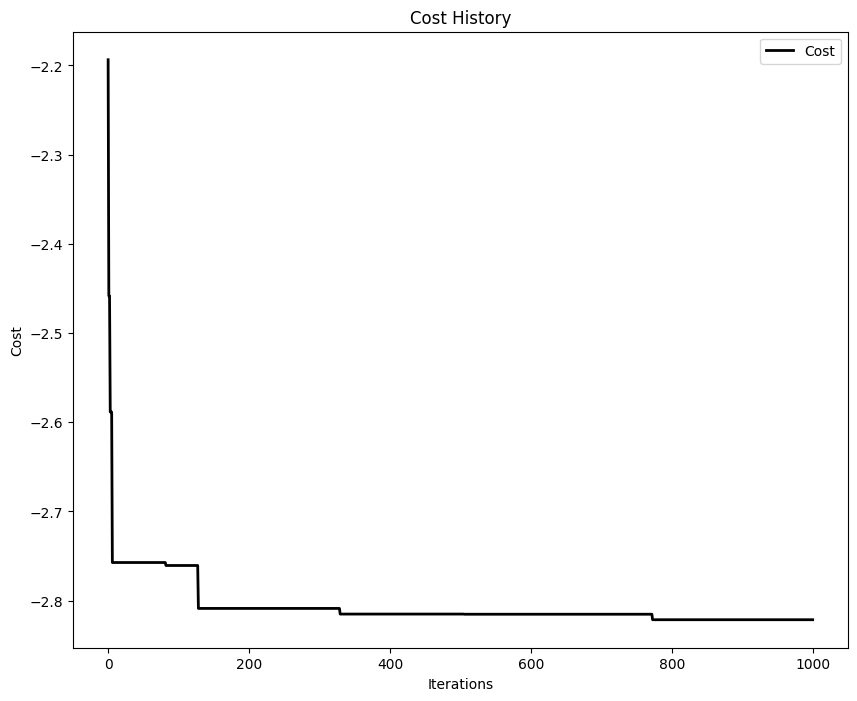

In [29]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
import numpy as np
import math
import matplotlib.pyplot as plt
from pyswarms.utils.plotters import plot_cost_history 

options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

x_max = np.ones(6) 
x_min = np.zeros(6)
my_bounds = (x_min, x_max)

def endurance(tab):
    x , y, z, u, v, w = tab
    return -(math.exp(-2*(y-math.sin(x))**2)+math.sin(z*u)+math.cos(v*w))

def f(x):
    n_particles = x.shape[0]
    j = [endurance(x[i]) for i in range(n_particles)]
    return np.array(j)

optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=6, options=options, bounds=my_bounds)

optimizer.optimize(f, iters=1000)

cost_history = optimizer.cost_history
plot_cost_history(cost_history)


iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration:  66
iteration:  67
iter

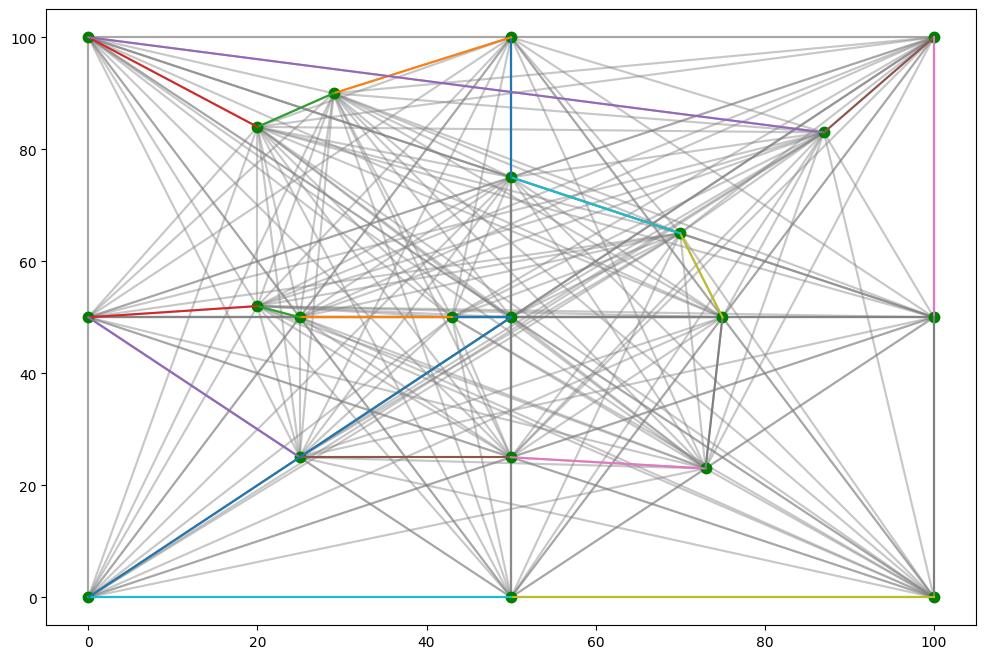

In [7]:
import matplotlib.pyplot as plt
import random

from aco import AntColony
import time 

COORDS = (
    (20, 52),
    (43, 50),
    (20, 84),
    (70, 65),
    (29, 90),
    (87, 83),
    (73, 23),
    (0,0),
    (100,0),
    (100,100),
    (0,100),
    (50,50),
    (50,0),
    (0,50),
    (100,50),
    (50,100),
    (50,25),
    (25,50),
    (75,50),
    (50,75),
    (25,25)  
    
)

def random_coord():
    r = random.randint(0, len(COORDS))
    return r

def plot_nodes(w=12, h=8):
    for x, y in COORDS:
        plt.plot(x, y, "g.", markersize=15)
    plt.axis("on")
    fig = plt.gcf()
    fig.set_size_inches([w, h])

 
def plot_all_edges():
    paths = ((a, b) for a in COORDS for b in COORDS)
    for a, b in paths:
        plt.plot((a[0], b[0]), (a[1], b[1]), color="gray", alpha=0.25)
        

plot_all_edges()
plot_nodes()
start1 = time.time()
colony = AntColony(COORDS, ant_count=300, alpha=0.5, beta=1.2, 
                    pheromone_evaporation_rate=0.40, pheromone_constant=1000.0,
                    iterations=300)

optimal_nodes = colony.get_path()
end1 = time.time()
print(optimal_nodes)
print("time", end1-start1)

for i in range(len(optimal_nodes) - 1):
    plt.plot(
        (optimal_nodes[i][0], optimal_nodes[i + 1][0]),
        (optimal_nodes[i][1], optimal_nodes[i + 1][1]),
    )

plt.show()

In [5]:
import time 
start = time.time()
colony = AntColony(COORDS, ant_count=600, alpha=0.5, beta=1.2, 
                    pheromone_evaporation_rate=0.40, pheromone_constant=1000.0,
                    iterations=300)

optimal_nodes = colony.get_path()
end = time.time()
print(optimal_nodes)
print("time", end - start)

# wieksza ilosc mrówek daje lepszy wynik, ale czas wykonania jest wiekszy


iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration:  66
iteration:  67
iter

In [10]:
print("pheromone constant 500")
import time 
start = time.time()
colony = AntColony(COORDS, ant_count=300, alpha=0.5, beta=1.2, 
                    pheromone_evaporation_rate=0.40, pheromone_constant=300.0,
                    iterations=300)

optimal_nodes = colony.get_path()
end = time.time()
print(optimal_nodes)
print("time", end - start)

# zmniejszenie pheromone constant daje gorszy wynik i czas wykonania jest mniejszy


pheromone constant 500
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration: 

In [11]:
import time 
start = time.time()
colony = AntColony(COORDS, ant_count=300, alpha=0.5, beta=1.2, 
                    pheromone_evaporation_rate=0.70, pheromone_constant=1000.0,
                    iterations=300)

optimal_nodes = colony.get_path()
end = time.time()
print(optimal_nodes)
print("time", end - start)

# zmniejszenie pheromone_evaporation_rate daje gorszy wynik i czas wykonania jest dluzszy 

iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration:  66
iteration:  67
iter

In [13]:
import time 
start = time.time()
colony3 = AntColony(COORDS, ant_count=300, alpha=0.5, beta=1.2, 
                    pheromone_evaporation_rate=0.40, pheromone_constant=1000.0,
                    iterations=600)

optimal_nodes3 = colony3.get_path()
end = time.time()
print(optimal_nodes3)
print("time", end - start)

# zwiekszenie ilosci literacji nie daje lepszeg wyniku i czas wykonania jest dluzszy

iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration:  66
iteration:  67
iter

In [15]:
import time 
start = time.time()
colony = AntColony(COORDS, ant_count=300, alpha=0.5, beta=1.2, 
                    pheromone_evaporation_rate=0.40, pheromone_constant=1000.0,
                    iterations=100)

optimal_nodes = colony.get_path()
end = time.time()
print(optimal_nodes)
print("time", end - start)

# 

iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration:  66
iteration:  67
iter

In [20]:
import time 
start = time.time()
colonyy = AntColony(COORDS, ant_count=300, alpha=0.5, beta=1.2, 
                    pheromone_evaporation_rate=0.20, pheromone_constant=1000.0,
                    iterations=100)

optimal_nodesy = colonyy.get_path()
end = time.time()
print(optimal_nodesy)
print("time", end - start)

# zmniejszenie pheromone_evaporation_rate daje gorszy wynik



iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration:  66
iteration:  67
iter

In [22]:
import time 
start = time.time()
colonyy = AntColony(COORDS, ant_count=300, alpha=1, beta=1.2, 
                    pheromone_evaporation_rate=0.20, pheromone_constant=1000.0,
                    iterations=100)

optimal_nodesy = colonyy.get_path()
end = time.time()
print(optimal_nodesy)
print("time", end - start)

# zwiekszenie alpha daje lepszy wynik


iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration:  66
iteration:  67
iter

In [23]:
import time 
start = time.time()
colonyy = AntColony(COORDS, ant_count=300, alpha=0.5, beta=2, 
                    pheromone_evaporation_rate=0.20, pheromone_constant=1000.0,
                    iterations=100)

optimal_nodesy = colonyy.get_path()
end = time.time()
print(optimal_nodesy)
print("time", end - start)

# zwiekszenie beta daje gorpszy wynik

iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration:  66
iteration:  67
iter

In [24]:
import time 
start = time.time()
colonyy = AntColony(COORDS, ant_count=300, alpha=0.5, beta=0.5, 
                    pheromone_evaporation_rate=0.20, pheromone_constant=1000.0,
                    iterations=100)

optimal_nodesy = colonyy.get_path()
end = time.time()
print(optimal_nodesy)
print("time", end - start)

# zmniejszenie beta daje lepszy wynik


iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29
iteration:  30
iteration:  31
iteration:  32
iteration:  33
iteration:  34
iteration:  35
iteration:  36
iteration:  37
iteration:  38
iteration:  39
iteration:  40
iteration:  41
iteration:  42
iteration:  43
iteration:  44
iteration:  45
iteration:  46
iteration:  47
iteration:  48
iteration:  49
iteration:  50
iteration:  51
iteration:  52
iteration:  53
iteration:  54
iteration:  55
iteration:  56
iteration:  57
iteration:  58
iteration:  59
iteration:  60
iteration:  61
iteration:  62
iteration:  63
iteration:  64
iteration:  65
iteration:  66
iteration:  67
iter